In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing important libraries

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data 

In [6]:
train_data=pd.read_csv("C://Users//ARYA SHARMA//Downloads//house-prices-advanced-regression-techniques (2)//house-prices-advanced-regression-techniques//train.csv")
test_data=pd.read_csv("C://Users//ARYA SHARMA//Downloads//house-prices-advanced-regression-techniques (2)//house-prices-advanced-regression-techniques//test.csv")

# Feature Engineering on train data 

In [7]:
train_data.shape

(1460, 81)

In [8]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train_data.shape

(1460, 81)

In [11]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
# Calculating the persent of missing data
def percent_missing(df):
    percent_nan=100*df.isnull().sum()/len(df)
    percent_nan=percent_nan[percent_nan>0].sort_values()
    return percent_nan
    
    

In [13]:
percent_nan=percent_missing(train_data)
percent_nan


Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [14]:
# Removing features having more than 80% missing data
features_remove=percent_nan[percent_missing(train_data)>80]
features_remove=features_remove.index.tolist()
train_data=train_data.drop(features_remove,axis=1)

In [15]:
percent_nan=percent_missing(train_data)
percent_nan


Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
dtype: float64

In [16]:
# For features having less than 1 percent of data missing
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0])
train_data['Electrical']=train_data['MasVnrArea'].fillna(train_data['Electrical'].mode()[0])



In [17]:
percent_nan=percent_missing(train_data)
percent_nan

BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
dtype: float64

In [18]:
# We see that only feature having int datatype and having missing data less than 10 is GarageYrBlt, so we 
#fill na values of it with the mean .
mean1=train_data['GarageYrBlt'].mean()
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(mean1)


In [19]:
# Other features' Nan values can be filled with string "None" fitting the context of the columns 
str_cols_left=['BsmtQual','BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
train_data[str_cols_left]=train_data[str_cols_left].fillna('None')


(array([0, 1]), [Text(0, 0, 'LotFrontage'), Text(1, 0, 'FireplaceQu')])

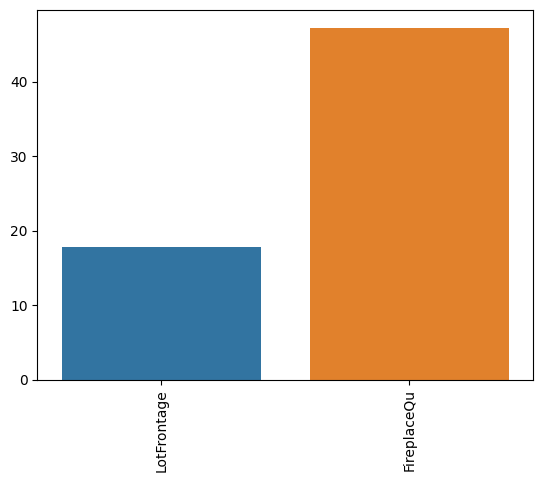

In [20]:
percent_nan=percent_missing(train_data)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [21]:
#As NA in FireplaceQu means no fireplace
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna('None')

<AxesSubplot:xlabel='LotFrontage', ylabel='Neighborhood'>

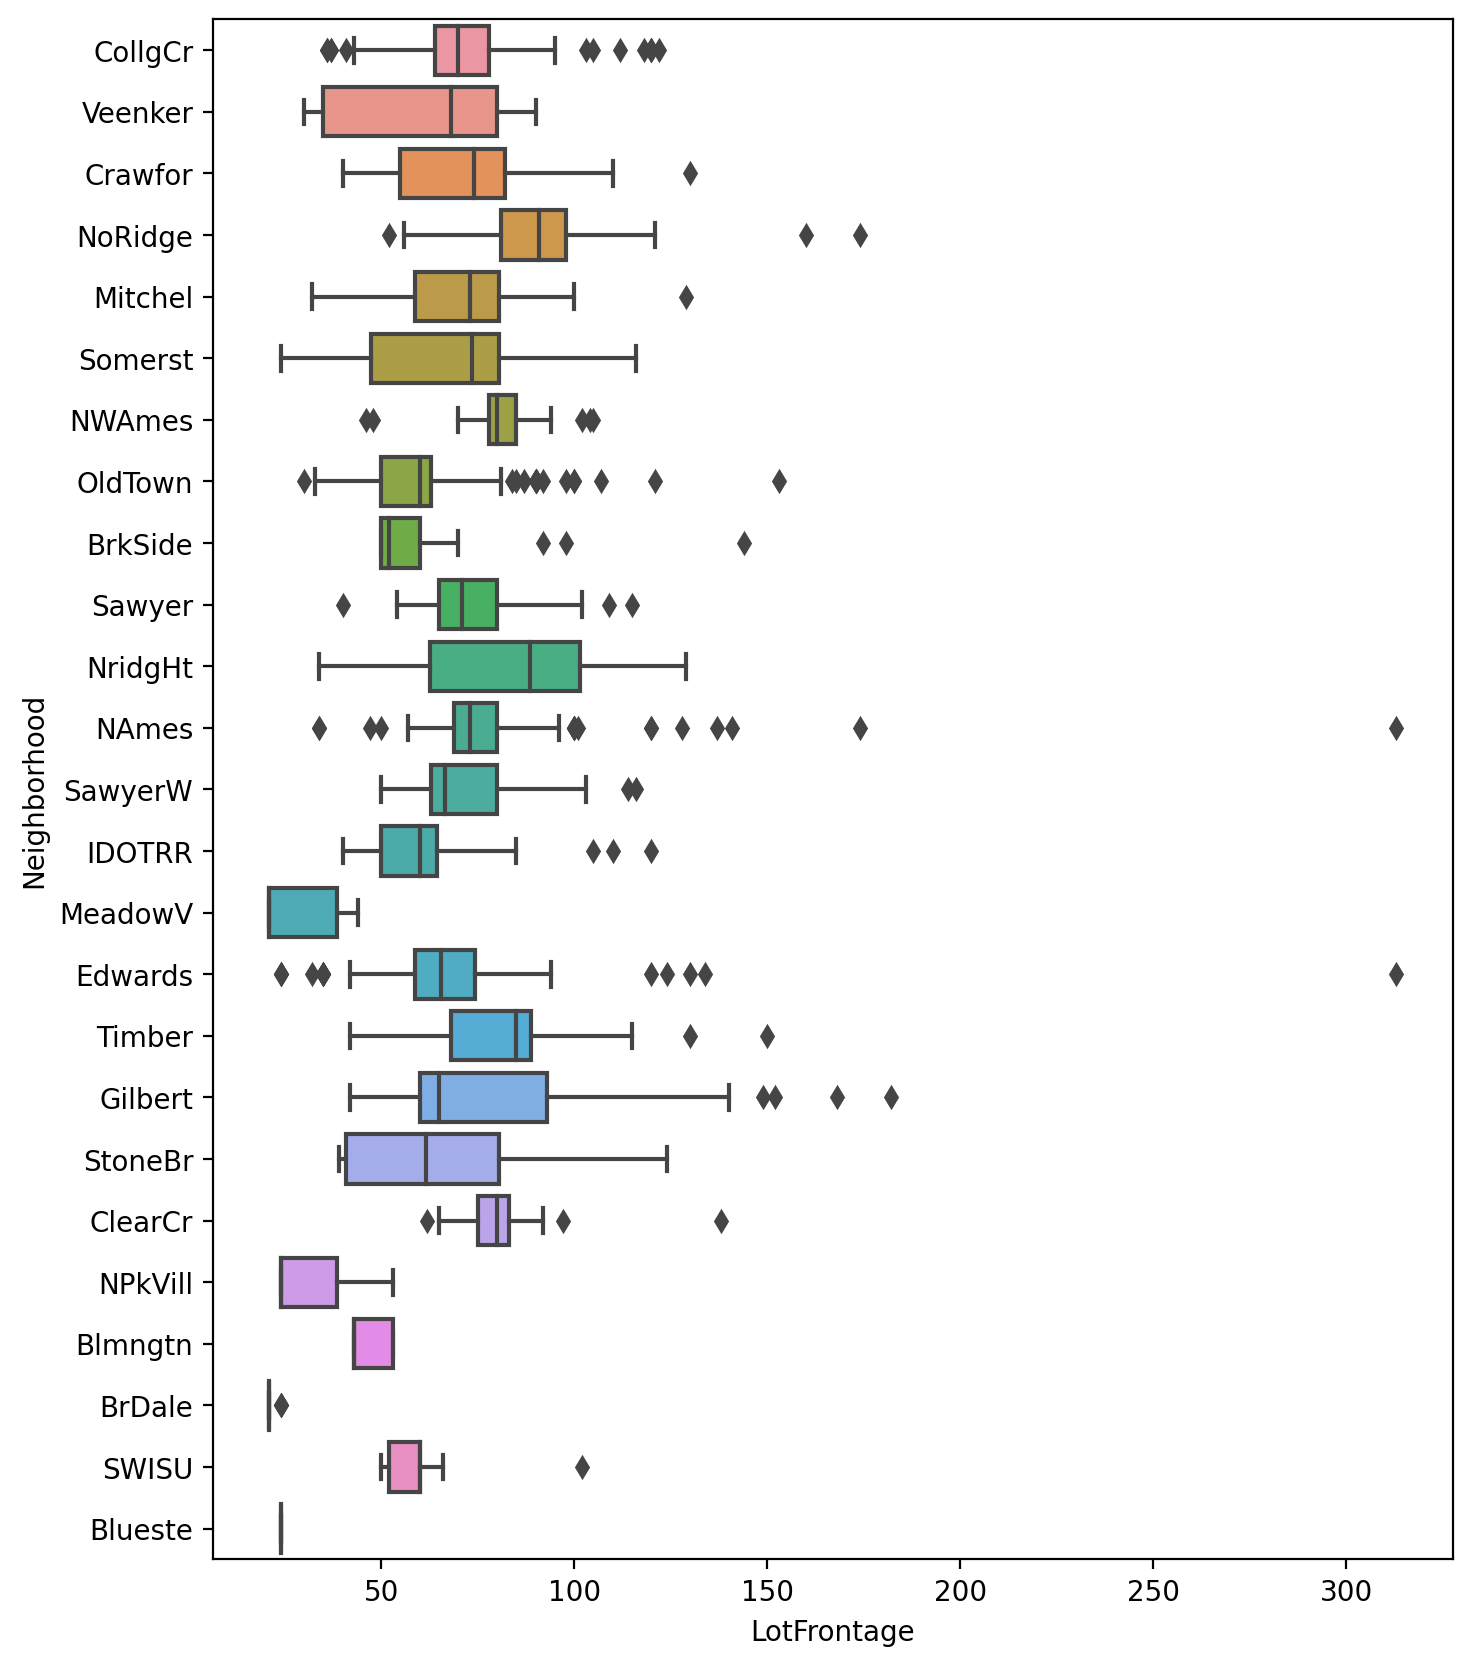

In [22]:
# Handling Lot Frontage
plt.figure(figsize=(8,10),dpi=200)
sns.boxplot(x='LotFrontage',y='Neighborhood',data=train_data,orient='h')

In [23]:
train_data.groupby('Neighborhood')['LotFrontage'].mean()

train_data['LotFrontage']=train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [24]:
percent_nan=percent_missing(train_data)
percent_nan

Series([], dtype: float64)

In [25]:
train_data.shape

(1460, 77)

## We have successfully cleaned our Train data

# Feature Engineering on Test Data

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [27]:
percent_nan=percent_missing(test_data)
percent_nan

TotalBsmtSF      0.068540
GarageArea       0.068540
GarageCars       0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
Functional       0.137080
Utilities        0.137080
BsmtHalfBath     0.137080
BsmtFullBath     0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
BsmtFinType2     2.878684
BsmtFinType1     2.878684
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtCond         3.084304
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
GarageYrBlt      5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64

In [28]:
# Removing features having more than 80% missing data
test_features_remove=percent_nan[percent_missing(test_data)>80]
test_features_remove=test_features_remove.index.tolist()
test_data=test_data.drop(test_features_remove,axis=1)

In [29]:
# Replacing Na in test with"none"
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna('None')

In [30]:
#handling missing Lotfrontage
test_data.groupby('Neighborhood')['LotFrontage'].mean()

test_data['LotFrontage']=test_data.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [31]:
percent_nan=percent_missing(test_data)
percent_nan

BsmtUnfSF       0.068540
GarageArea      0.068540
GarageCars      0.068540
KitchenQual     0.068540
TotalBsmtSF     0.068540
BsmtFinSF2      0.068540
BsmtFinSF1      0.068540
SaleType        0.068540
Exterior2nd     0.068540
Exterior1st     0.068540
Utilities       0.137080
Functional      0.137080
BsmtHalfBath    0.137080
BsmtFullBath    0.137080
MSZoning        0.274160
MasVnrArea      1.028101
MasVnrType      1.096642
BsmtFinType2    2.878684
BsmtFinType1    2.878684
BsmtQual        3.015764
BsmtExposure    3.015764
BsmtCond        3.084304
GarageType      5.209047
GarageCond      5.346127
GarageYrBlt     5.346127
GarageFinish    5.346127
GarageQual      5.346127
dtype: float64

In [32]:
# We see that only feature having int datatype and having missing data less than 10 is GarageYrBlt, so we 
#fill na values of it with the mean .
mean1=test_data['GarageYrBlt'].mean()
test_data['GarageYrBlt']=test_data['GarageYrBlt'].fillna(mean1)

In [33]:
percent_nan=percent_missing(test_data)
percent_nan

BsmtFinSF2      0.068540
GarageArea      0.068540
GarageCars      0.068540
KitchenQual     0.068540
TotalBsmtSF     0.068540
BsmtUnfSF       0.068540
BsmtFinSF1      0.068540
SaleType        0.068540
Exterior1st     0.068540
Exterior2nd     0.068540
BsmtHalfBath    0.137080
Utilities       0.137080
Functional      0.137080
BsmtFullBath    0.137080
MSZoning        0.274160
MasVnrArea      1.028101
MasVnrType      1.096642
BsmtFinType2    2.878684
BsmtFinType1    2.878684
BsmtQual        3.015764
BsmtExposure    3.015764
BsmtCond        3.084304
GarageType      5.209047
GarageCond      5.346127
GarageFinish    5.346127
GarageQual      5.346127
dtype: float64

In [34]:
test_str_cols_left=['BsmtQual','BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType']
test_data[test_str_cols_left]=test_data[test_str_cols_left].fillna('None')
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(0)


In [35]:
percent_nan=percent_missing(test_data)
percent_nan

Exterior1st     0.06854
Exterior2nd     0.06854
BsmtFinSF1      0.06854
BsmtFinSF2      0.06854
BsmtUnfSF       0.06854
TotalBsmtSF     0.06854
KitchenQual     0.06854
GarageCars      0.06854
GarageArea      0.06854
SaleType        0.06854
Utilities       0.13708
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
Functional      0.13708
MSZoning        0.27416
dtype: float64

In [36]:
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['Exterior1st']=test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mode()[0])
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mode()[0])
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mode()[0])
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mode()[0])
test_data['KitchenQual']=test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['GarageCars']=test_data['GarageCars'].fillna(test_data['GarageCars'].mode()[0])
test_data['GarageArea']=test_data['GarageArea'].fillna(test_data['GarageArea'].mode()[0])
test_data['SaleType']=test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])
test_data['Utilities']=test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0])
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mode()[0])
test_data['Functional']=test_data['Functional'].fillna(test_data['Functional'].mode()[0])
test_data['MSZoning']=test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])


In [37]:
percent_nan=percent_missing(test_data)
percent_nan

Series([], dtype: float64)

## We have succesfully cleaned both train and test data

In [38]:
train_data.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.346962
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470177
Electrical       0.472614
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice   

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

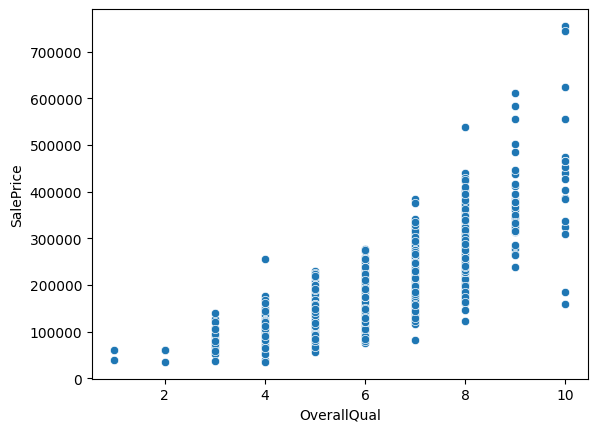

In [39]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=train_data)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

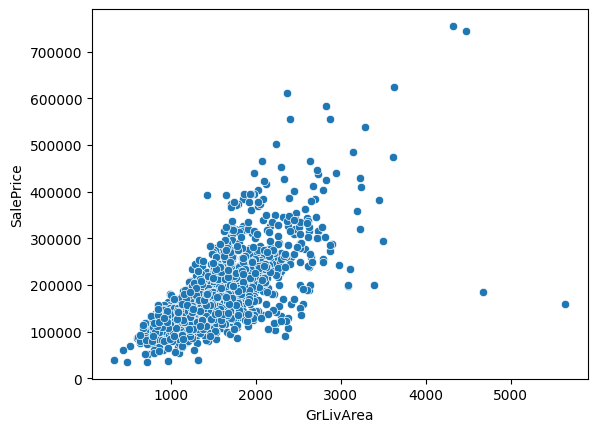

In [40]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_data)

In [41]:
train_data[(train_data['OverallQual']>8) & (train_data['SalePrice']<200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


In [42]:
drop_index=train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<200000)].index

In [43]:
drop_index

Int64Index([523, 1298], dtype='int64')

In [44]:
train_data=train_data.drop(drop_index,axis=0)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

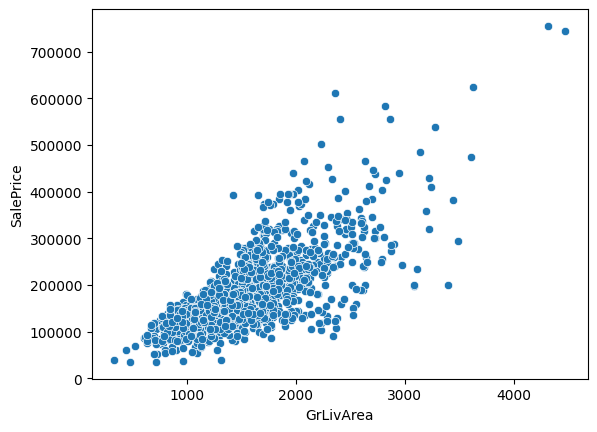

In [45]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_data)

In [46]:
percent_nan=percent_missing(test_data)
percent_nan

Series([], dtype: float64)

# One Hot encoding for categorical functions

In [47]:
all_data=pd.concat([train_data,test_data],axis=0)

In [48]:
all_data.shape

(2917, 77)

In [49]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [50]:
all_data.select_dtypes(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,None,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal


In [51]:
all_data_nums = all_data.select_dtypes(exclude='object')
all_data_objs = all_data.select_dtypes(include='object')

In [52]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [53]:
all_data_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2917 non-null   int64  
 1   MSSubClass     2917 non-null   int64  
 2   LotFrontage    2917 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   OverallQual    2917 non-null   int64  
 5   OverallCond    2917 non-null   int64  
 6   YearBuilt      2917 non-null   int64  
 7   YearRemodAdd   2917 non-null   int64  
 8   MasVnrArea     2917 non-null   float64
 9   BsmtFinSF1     2917 non-null   float64
 10  BsmtFinSF2     2917 non-null   float64
 11  BsmtUnfSF      2917 non-null   float64
 12  TotalBsmtSF    2917 non-null   float64
 13  1stFlrSF       2917 non-null   int64  
 14  2ndFlrSF       2917 non-null   int64  
 15  LowQualFinSF   2917 non-null   int64  
 16  GrLivArea      2917 non-null   int64  
 17  BsmtFullBath   2917 non-null   float64
 18  BsmtHalf

In [54]:
all_data_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2917 non-null   object
 1   Street         2917 non-null   object
 2   LotShape       2917 non-null   object
 3   LandContour    2917 non-null   object
 4   Utilities      2917 non-null   object
 5   LotConfig      2917 non-null   object
 6   LandSlope      2917 non-null   object
 7   Neighborhood   2917 non-null   object
 8   Condition1     2917 non-null   object
 9   Condition2     2917 non-null   object
 10  BldgType       2917 non-null   object
 11  HouseStyle     2917 non-null   object
 12  RoofStyle      2917 non-null   object
 13  RoofMatl       2917 non-null   object
 14  Exterior1st    2917 non-null   object
 15  Exterior2nd    2917 non-null   object
 16  MasVnrType     2917 non-null   object
 17  ExterQual      2917 non-null   object
 18  ExterCond      2917 non-null

In [55]:
all_data_objs=pd.get_dummies(all_data_objs,drop_first=True)

In [56]:
final=pd.concat([all_data_nums,all_data_objs],axis=1)

In [57]:
train_data.shape

(1458, 77)

In [58]:
final

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0


In [59]:
final =final.loc[:,~final.columns.duplicated()]

In [60]:
final.shape

(2917, 571)

In [61]:
df_train=final.iloc[:1458,:]
df_test=final.iloc[1458:,:]

In [62]:
df_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,0,0,0,0,1,0,0,0,1,0


In [63]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\ARYA SHARMA\AppData\Local\Temp\ipykernel_19500\2787191513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'],axis=1,inplace=True)


# Selection of Algorithm and Model building

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X=df_train.drop(['SalePrice'],axis=1)
y=df_train['SalePrice']

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler=StandardScaler()

In [69]:
scaler.fit(X_train)

StandardScaler()

In [70]:
X_train=scaler.transform(X_train)

In [71]:
X_test=scaler.transform(X_test)

In [72]:
from sklearn.linear_model import ElasticNet

In [73]:
base_elastic_model=ElasticNet()

In [74]:
param_grid={'alpha':[0.1,1,5,10,50,100],'l1_ratio':[0.1,0.5,0.7,0.99,1]}

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
grid_model=GridSearchCV(estimator=base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,verbose=1)

In [77]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\ARYA SHARMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+11, tolerance: 6.648e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\ARYA SHARMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+11, tolerance: 6.662e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\ARYA SHARMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [78]:
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1)

In [79]:
y_pred=grid_model.predict(df_test)

c:\Users\ARYA SHARMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [80]:
y_pred

array([1.43052330e+08, 1.80294109e+08, 1.82095979e+08, ...,
       2.18967920e+08, 1.34724493e+08, 1.63012169e+08])

In [81]:
submission = pd.DataFrame ({ 'Id': test_data['Id'], 
    'SalePrice': y_pred})

In [82]:
submission['SalePrice']

0       1.430523e+08
1       1.802941e+08
2       1.820960e+08
3       1.531099e+08
4       1.086641e+08
            ...     
1454    7.268582e+07
1455    7.441714e+07
1456    2.189679e+08
1457    1.347245e+08
1458    1.630122e+08
Name: SalePrice, Length: 1459, dtype: float64

In [83]:
submission.to_csv('sample_submission.csv',index=False)